# COVID-19 and Airbnb activity
## Case study: Madrid

>  Let's take a look at how the COVID-19 situation is affecting the Airbnb activity in one of the hotspots of the pandemic: Madrid

The data is taken from http://insideairbnb.com/get-the-data.html . This data is already very clean.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**Gathering data**

In [14]:
df_mar = pd.read_csv('calendar_madrid_2019_8_3.csv') #march data on bookings
df_feb = pd.read_csv('calendar_madrid_2019_6_2.csv') #february data on bookings
#apt_mar = pd.read_csv('listings_17_3.csv') #march data on properties
#apt_feb = pd.read_csv('listings_18_2.csv') #february data propierties

**Assesing data**

Let's take a look on the data
- df dataframes:

In [3]:
df_mar.shape, df_feb.shape

((8092050, 7), (7973425, 7))

In [4]:
df_mar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [5]:
df_mar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,374558,2020-03-17,f,$53.00,$53.00,1,31
1,102091,2020-03-17,t,$194.00,$194.00,3,30
2,102091,2020-03-18,t,$194.00,$194.00,3,30
3,102091,2020-03-19,t,$194.00,$194.00,3,30
4,102091,2020-03-20,t,$275.00,$275.00,3,30


- apt dataframes:

In [7]:
apt_mar.shape, apt_feb.shape

((22170, 16), (21845, 16))

In [8]:
apt_mar.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
apt_mar.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,70,1,75,2020-02-29,0.62,1,76
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,30,4,33,2018-07-15,0.50,2,228
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,6,277
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,89,4,10,2020-03-01,0.15,1,335
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.64,1,327


### Q1: How did the bookings change with the pandemic?

> We have a year booking data from Feb 18th and from march 17th. Between these two dates the COVID was declared a pandemic by the WHO (3/11) and Madrid went on quarantine (14/3).

Let's take a quick look on how the bookings change

In [13]:
df_feb.available.value_counts()  #f -> False: not available, t -> True: available

f    4402244
t    3571181
Name: available, dtype: int64

In [12]:
df_mar.available.value_counts()

f    4297525
t    3794525
Name: available, dtype: int64

The number of available places and dates increases a 6% but we need to take a more careful look at this to make a fair comparision. We merge the two data sets in order to keep only the places and the dates with information in both data sets.

In [15]:
df = df_feb.merge(df_mar, on=['listing_id', 'date'], suffixes=['_feb','_mar'])

In [16]:
df.head()

,listing_id,date,available_feb,price_feb,adjusted_price_feb,minimum_nights_feb,maximum_nights_feb,available_mar,price_mar,adjusted_price_mar,minimum_nights_mar,maximum_nights_mar
0,470132,2020-03-17,t,$83.00,$83.00,3,1125,t,$83.00,$75.00,3,1125
1,470132,2020-03-18,f,$83.00,$83.00,3,1125,t,$83.00,$75.00,3,1125
2,470132,2020-03-19,f,$83.00,$83.00,3,1125,t,$83.00,$75.00,3,1125
3,470132,2020-03-20,f,$83.00,$83.00,3,1125,t,$83.00,$75.00,3,1125
4,470132,2020-03-21,f,$83.00,$83.00,3,1125,t,$83.00,$75.00,3,1125


In [17]:
df.dtypes

listing_id             int64
date                  object
available_feb         object
price_feb             object
adjusted_price_feb    object
minimum_nights_feb     int64
maximum_nights_feb     int64
available_mar         object
price_mar             object
adjusted_price_mar    object
minimum_nights_mar     int64
maximum_nights_mar     int64
dtype: object

There are some wrong dtypes. We want to have booleans for the available columns and float for the price columns. Also the date column is not datetime dtype.

**Cleaning data**

In [16]:
df['date'] = pd.to_datetime(df.date)
df[['available_feb','available_mar']] = df[['available_feb','available_mar']].replace({'f':0,'t':1}).astype('bool')
prices = ['price_feb','adjusted_price_feb','price_mar','adjusted_price_mar']
for col in prices:
    df[col] = df[col].str.replace('$','').str.replace(',','').astype('float')

In [22]:
df.dtypes

listing_id                     int64
date                  datetime64[ns]
available_feb                   bool
price_feb                    float64
adjusted_price_feb           float64
minimum_nights_feb             int64
maximum_nights_feb             int64
available_mar                   bool
price_mar                    float64
adjusted_price_mar           float64
minimum_nights_mar             int64
maximum_nights_mar             int64
dtype: object

In [23]:
df.head()

,listing_id,date,available_feb,price_feb,adjusted_price_feb,minimum_nights_feb,maximum_nights_feb,available_mar,price_mar,adjusted_price_mar,minimum_nights_mar,maximum_nights_mar
0,470132,2020-03-17,True,83.0,83.0,3,1125,True,83.0,75.0,3,1125
1,470132,2020-03-18,False,83.0,83.0,3,1125,True,83.0,75.0,3,1125
2,470132,2020-03-19,False,83.0,83.0,3,1125,True,83.0,75.0,3,1125
3,470132,2020-03-20,False,83.0,83.0,3,1125,True,83.0,75.0,3,1125
4,470132,2020-03-21,False,83.0,83.0,3,1125,True,83.0,75.0,3,1125


In [17]:
# period column to group by month-year
df['Period']=df['date'].dt.to_period('M')

**Analysing data**

In [18]:
# How many available places are by month according to Feb and March data
available = df.groupby(['Period'],as_index=True)[['available_feb','available_mar']].sum()

In [27]:
available

,available_feb,available_mar
Period,,
2020-03,140894.0,163046.0
2020-04,307840.0,338817.0
2020-05,328398.0,347744.0
2020-06,318292.0,342588.0
2020-07,335026.0,330180.0
2020-08,318705.0,351270.0
2020-09,264709.0,288385.0
2020-10,273046.0,270056.0
2020-11,258350.0,261969.0


Note: 2020-03 and 2021-02 has less days of data and that's why the sum is smaller.

We want to have the occupation rate because is more clear and easier to understand:

In [19]:
for col in available.columns:
    available[col]=1-(available[col]/df.groupby(['Period']).listing_id.count())
available

,available_feb,available_mar
Period,,
2019-03,0.520662,0.697538
2019-04,0.501015,0.613541
2019-05,0.530901,0.542636
2019-06,0.511841,0.536323
2019-07,0.479721,0.500520
2019-08,0.536806,0.464755
2019-09,0.563679,0.559615
2019-10,0.561797,0.569022
2019-11,0.575253,0.560507


In [20]:
melted = available.reset_index(level=0)
melted

,Period,available_feb,available_mar
0,2019-03,0.520662,0.697538
1,2019-04,0.501015,0.613541
2,2019-05,0.530901,0.542636
3,2019-06,0.511841,0.536323
4,2019-07,0.479721,0.500520
5,2019-08,0.536806,0.464755
6,2019-09,0.563679,0.559615
7,2019-10,0.561797,0.569022
8,2019-11,0.575253,0.560507
9,2019-12,0.583862,0.587575


In [21]:
melted.to_csv('ocup_madrid_2019.csv', index=False)

**Visualising data**

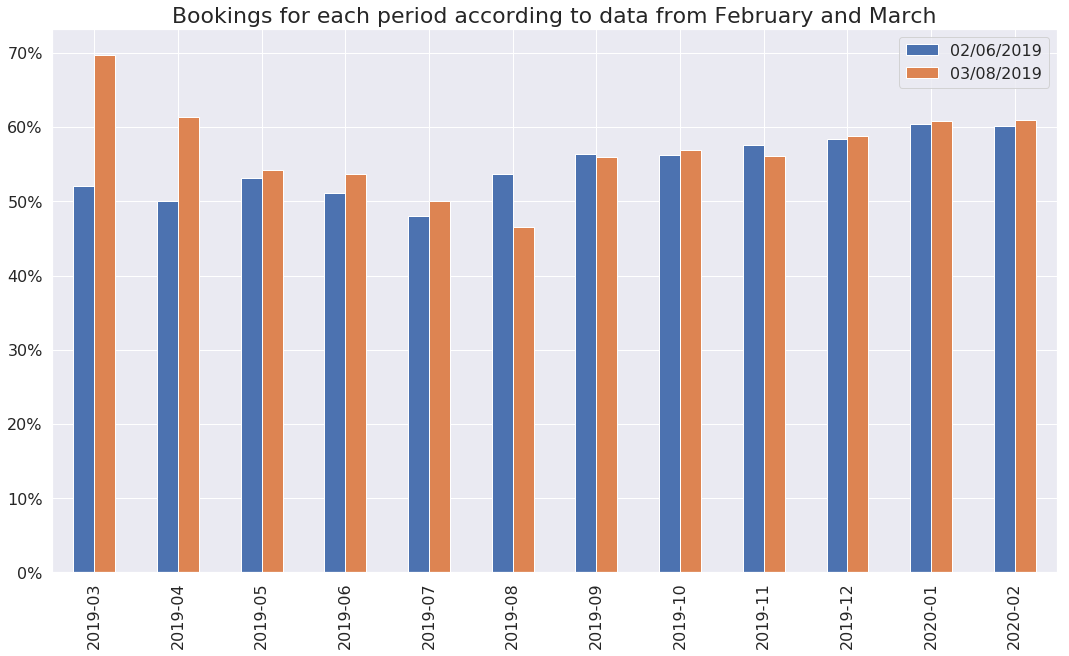

In [12]:
ax = available.plot(kind='bar',legend=True, figsize=(18,10), fontsize=16) #ocupation rate for each period with data from feb and from march
ax.set_xlabel('',fontsize=18)
ax.set_ylabel('',fontsize=22)
ax.legend(['02/06/2019','03/08/2019'],fontsize=16)
plt.yticks(ticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],labels=['0%','10%','20%','30%','40%','50%','60%','70%'])
plt.title('Bookings for each period according to data from February and March',fontsize=22);

> Conclusion: We can see that the booking percent drops from Febraury to March when consider the periods until September. This means that some reservations were canceled. This can be due to the fact that Madrid entered in quarantine and all tourism activities were cancelled so people started to cancell their reservations for the following months.

**Analysing data**

In the apt data frames there is information for the availability of each property for the next 365 days, let's see how this changes.

In [71]:
apt = apt_feb.merge(apt_mar, on=['id'], suffixes=['_feb','_mar'])

In [72]:
apt.head()

,id,name_feb,host_id_feb,host_name_feb,neighbourhood_group_feb,neighbourhood_feb,latitude_feb,longitude_feb,room_type_feb,price_feb,...,latitude_mar,longitude_mar,room_type_mar,price_mar,minimum_nights_mar,number_of_reviews_mar,last_review_mar,reviews_per_month_mar,calculated_host_listings_count_mar,availability_365_mar
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,70,...,40.45724,-3.67688,Private room,70,1,75,2020-02-29,0.62,1,76
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,...,40.40341,-3.74084,Private room,30,4,33,2018-07-15,0.50,2,228
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,...,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,6,277
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,89,...,40.42202,-3.70395,Entire home/apt,89,4,10,2020-03-01,0.15,1,335
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,...,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.64,1,327


In [74]:
df2=apt[['id','availability_365_feb', 'availability_365_mar']]

In [75]:
df2.head()

,id,availability_365_feb,availability_365_mar
0,6369,77,76
1,21853,200,228
2,23001,249,277
3,24805,364,335
4,24836,322,327


In [81]:
df2.describe()

,id,availability_365_feb,availability_365_mar
count,2.082600e+04,20826.000000,20826.000000
mean,2.553337e+07,161.769951,169.082877
std,1.184133e+07,132.193630,134.376431
min,6.369000e+03,0.000000,0.000000
25%,1.727121e+07,31.000000,37.000000
50%,2.695528e+07,145.000000,159.000000
75%,3.521585e+07,294.000000,305.000000
max,4.235976e+07,365.000000,365.000000


The mean and the media are a little bigger in March which confirms our previous conclusion

### Q2: How many money is Airbnb not earning due to this cancelations?

Let's consider only the booking until september

In [83]:
#properties going from not-available to available
des = df[ (df.date < '2020-10-01') & (df.available_feb == False) & (df.available_mar == True) ]
des.shape

(309067, 13)

In [84]:
# properties going from available to not-available
ocu = df[ (df.date < '2020-10-01') & (df.available_feb == True) & (df.available_mar == False) ]
ocu.shape

(160901, 13)

In [86]:
des['price_mar'].describe()

count    309067.000000
mean        110.736462
std         171.761492
min           9.000000
25%          48.000000
50%          75.000000
75%         115.000000
max        8904.000000
Name: price_mar, dtype: float64

In [87]:
ocu['price_mar'].describe()

count    160901.000000
mean        129.523483
std         429.235837
min           9.000000
25%          40.000000
50%          70.000000
75%         110.000000
max       10998.000000
Name: price_mar, dtype: float64

Some of this prices look wrong, but they are real! I checked that on the airbnb webpage.

In [89]:
(ocu['price_mar'].sum()-des['price_mar'].sum())*15/100

-2007679.2

> It's not clear the exact percent that goes to Airbnb but accordingly to their web page https://www.airbnb.com/help/article/1857/what-is-the-airbnb-service-fee?locale=en&_set_bev_on_new_domain=1585349580_Mzc3YjUwM2UwMjBj we can estimate a 15%

> Conclusion: Airbnb is loosing (or not earning) $2,007,679 due to cancellations for the next 7 months

### Q3: Which type of accomodations are the most damaged?

In [94]:
apt.room_type_mar.value_counts()

Entire home/apt    12779
Private room        7474
Shared room          326
Hotel room           247
Name: room_type_mar, dtype: int64

In [105]:
# des
des_type = (apt[apt.availability_365_mar > apt.availability_365_feb].room_type_mar.value_counts()/apt.room_type_mar.value_counts()).to_frame() 

In [104]:
#ocu
ocu_type = (apt[apt.availability_365_mar < apt.availability_365_feb].room_type_mar.value_counts()/apt.room_type_mar.value_counts()).to_frame() 

In [109]:
des_type

,room_type_mar
Entire home/apt,0.575397
Private room,0.418651
Shared room,0.417178
Hotel room,0.457490


In [112]:
type_dif = des_type.merge(ocu_type, left_index=True,right_index=True,suffixes=['_des','_ocu']) 

In [113]:
type_dif

,room_type_mar_des,room_type_mar_ocu
Entire home/apt,0.575397,0.223883
Private room,0.418651,0.167514
Shared room,0.417178,0.153374
Hotel room,0.457490,0.465587


**Visualising data**

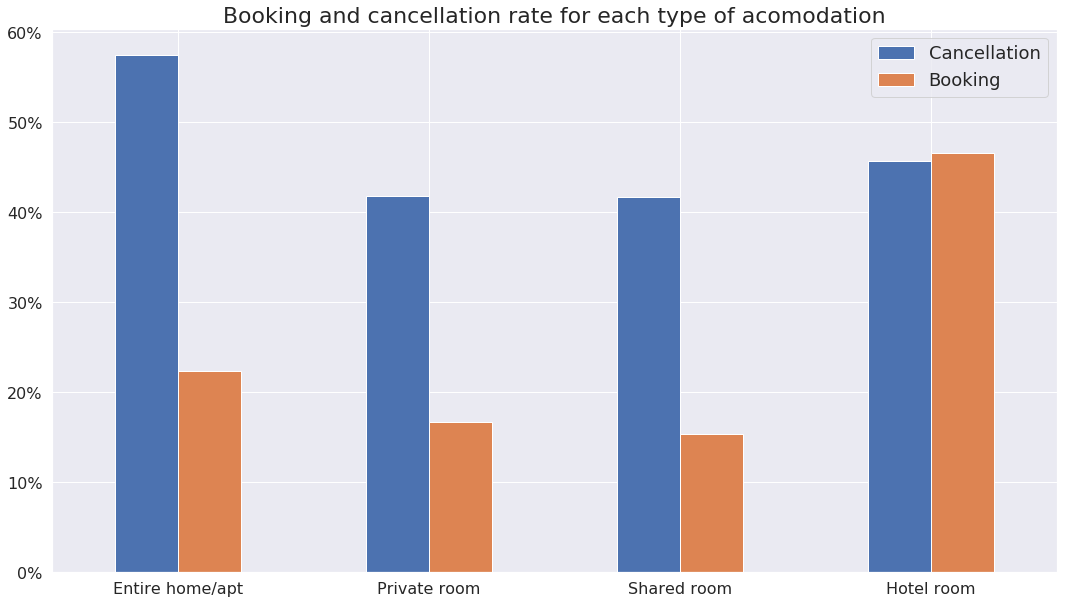

In [121]:
ax = type_dif.plot(kind='bar',legend=True, figsize=(18,10), fontsize=16,rot=0) #ocupation rate for each period with data from feb and from march
ax.set_xlabel('',fontsize=18)
ax.set_ylabel('',fontsize=22)
ax.legend(['Cancellation','Booking'],fontsize=18)
plt.yticks(ticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6],labels=['0%','10%','20%','30%','40%','50%','60%'])
plt.title('Booking and cancellation rate for each type of acomodation',fontsize=22);

> We see that almost 60% of the Entire home/apt went suffered cancellations while for the others types is around 40%. On the other hand, there was a 46% increase on bookings for Hotel rooms while for the other types is significative smaller.